In [76]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from env import user, password, host
import os
from acquire import wrangle_store_data
import warnings
warnings.filterwarnings("ignore")

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

import acquire as a
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [3]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [4]:
url = "https://gist.githubusercontent.com/ryanorsinger/0ec766c66f4089bdcbc1d4fb294a3394/raw/197c1f0d7b55a45f29437811bc73d9c4ef8af647/sa_temps.csv"
df = pd.read_csv(url, index_col='datetime', parse_dates=True).sort_index()
df.temp = (df.temp - 273.15) * 1.8 + 32

print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

df.head(10)

Date Range: 2012-10-01 13:00:00 to 2017-11-30 00:00:00
Shape: (45252, 1)


,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747
2012-10-01 18:00:00,61.327473
2012-10-01 19:00:00,61.390200
2012-10-01 20:00:00,61.452926
2012-10-01 21:00:00,61.515652


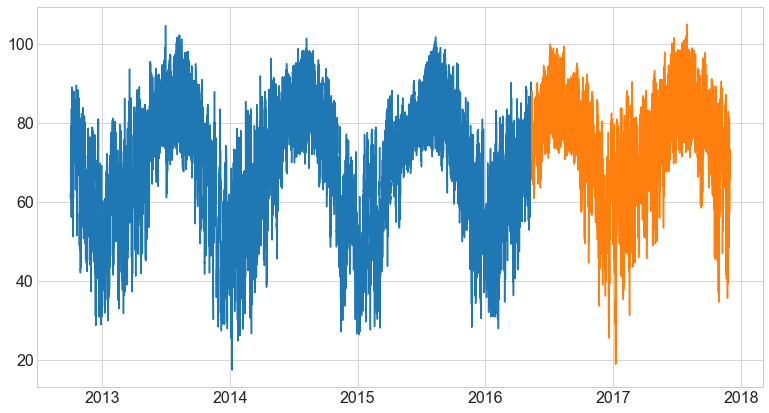

In [5]:
train_size = 0.70 # 70% train, 30% test
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # Everything up to but not including the test_start_index
test = df[test_start_index:] # Everything from the test_start_index to the end

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

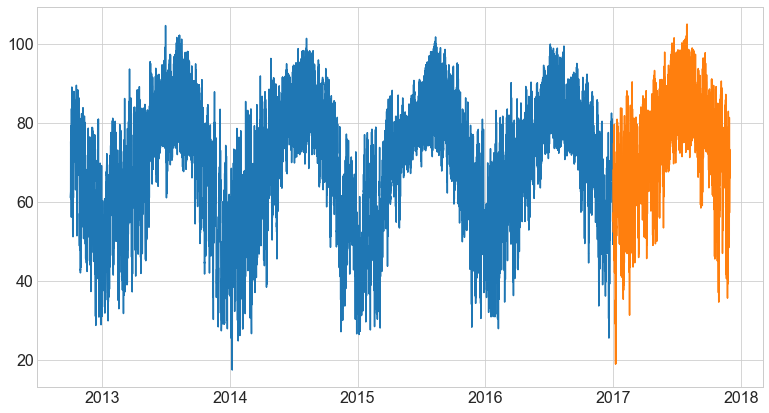

In [6]:
train = df[:'2016'] # includes 2016
test = df['2017'] 

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

In [7]:
y = train.temp
y.head()

datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
Name: temp, dtype: float64

In [8]:
y.index

DatetimeIndex(['2012-10-01 13:00:00', '2012-10-01 14:00:00',
               '2012-10-01 15:00:00', '2012-10-01 16:00:00',
               '2012-10-01 17:00:00', '2012-10-01 18:00:00',
               '2012-10-01 19:00:00', '2012-10-01 20:00:00',
               '2012-10-01 21:00:00', '2012-10-01 22:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=37259, freq=None)

<AxesSubplot:title={'center':'Distribution of Temperature'}, xlabel='Temperature in Fahrenheit', ylabel='Frequency'>

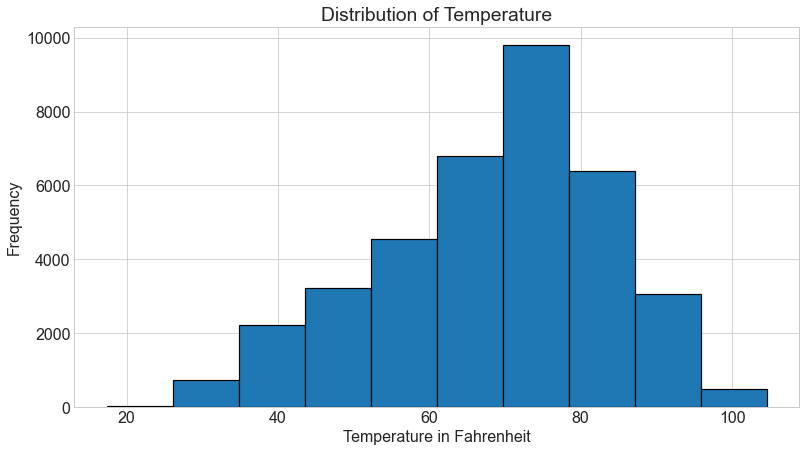

In [9]:
plt.title('Distribution of Temperature')
plt.xlabel('Temperature in Fahrenheit')
y.plot.hist(linewidth=1.2, edgecolor='black')

In [10]:
# make an new column 'month'
train['month'] = train.index.strftime('%m-%b')

In [11]:
train.head()

,temp,month
datetime,,
2012-10-01 13:00:00,61.052000,10-Oct
2012-10-01 14:00:00,61.076568,10-Oct
2012-10-01 15:00:00,61.139294,10-Oct
2012-10-01 16:00:00,61.202020,10-Oct
2012-10-01 17:00:00,61.264747,10-Oct


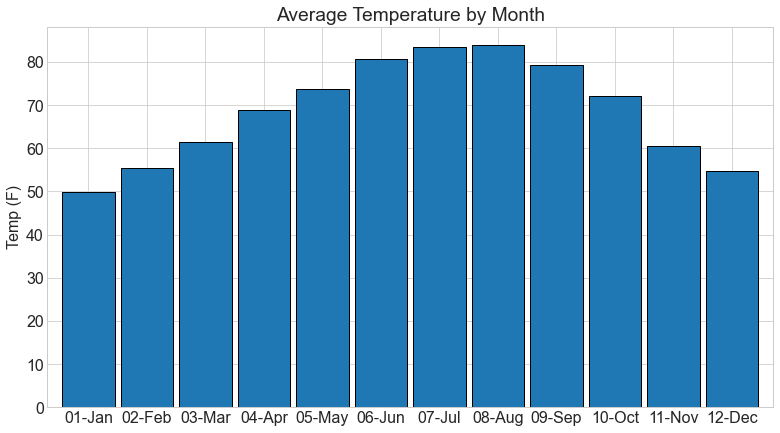

In [12]:
ax = train.groupby(train.month).temp.mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temperature by Month', xlabel='', ylabel='Temp (F)')
plt.show()

In [13]:
train.groupby('month').describe()

temp                                                       \
         count       mean        std      min        25%        50%   
month                                                                 
01-Jan  2976.0  49.831129  11.776940  17.4200  40.484750  49.352000   
02-Feb  2712.0  55.558854  12.527302  27.5582  45.353300  57.218000   
03-Mar  2976.0  61.421913  11.471243  26.6180  53.777900  62.366228   
04-Apr  2880.0  68.855211   9.407738  38.3720  63.347300  69.546815   
05-May  2976.0  73.742506   8.197797  45.0680  69.414950  74.102000   
06-Jun  2880.0  80.614231   6.423662  63.4820  75.884000  79.812500   
07-Jul  2976.0  83.449665   7.620765  60.9800  77.247500  82.238000   
08-Aug  2976.0  83.964775   7.904737  67.6040  77.428850  82.637600   
09-Sep  2880.0  79.356778   7.690668  54.3764  74.077025  78.601250   
10-Oct  3707.0  72.065809   9.829575  41.6975  65.567000  72.985100   
11-Nov  3600.0  60.545556  11.964570  27.1040  52.857500  62.096000   
12-Dec  3720.0  54.689498  11.862930  25.5020  45.950000  54.954500   

                            
              75%      max  
month                       
01-Jan  59.017550   83.084  
02-Feb  64.994000   85.334  
03-Mar  69.446360   93.542  
04-Apr  75.114500   96.224  
05-May  78.980000   95.432  
06-Jun  85.370000  104.540  
07-Jul  90.198500  101.516  
08-Aug  90.576500  102.092  
09-Sep  85.177175   98.510  
10-Oct  79.036700   95.090  
11-Nov  69.336500   87.836  
12-Dec  63.896000   83.372

<AxesSubplot:xlabel='month', ylabel='temp'>

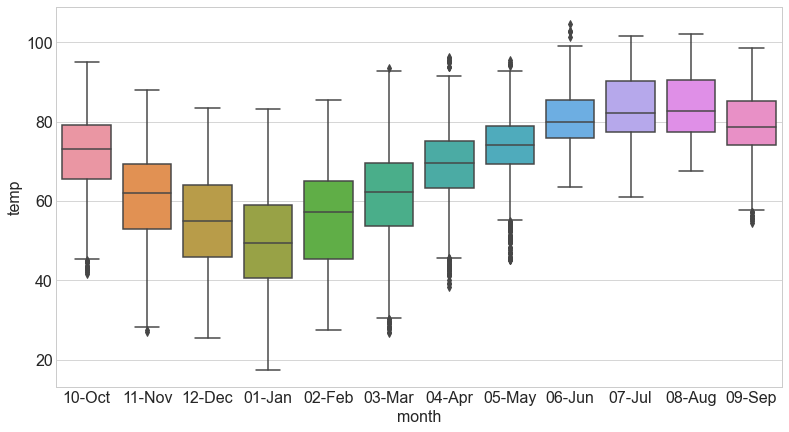

In [14]:
# boxplot for each month
sns.boxplot(data = train, x = 'month', y = 'temp')

In [15]:
train['weekday'] = train.index.day_name()

In [16]:
train.head()

,temp,month,weekday
datetime,,,
2012-10-01 13:00:00,61.052000,10-Oct,Monday
2012-10-01 14:00:00,61.076568,10-Oct,Monday
2012-10-01 15:00:00,61.139294,10-Oct,Monday
2012-10-01 16:00:00,61.202020,10-Oct,Monday
2012-10-01 17:00:00,61.264747,10-Oct,Monday


[Text(0.5, 1.0, 'Average Temperature by Day of Week')]

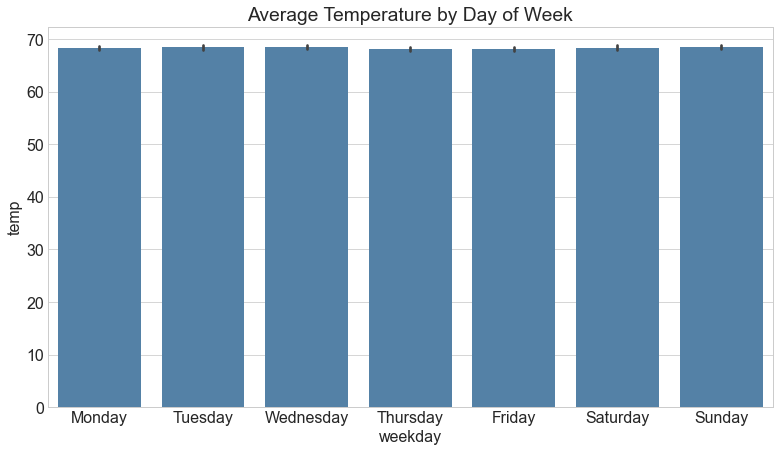

In [17]:
sns.barplot(data=train, x='weekday', y='temp', color='steelblue')\
    .set(title='Average Temperature by Day of Week')

<AxesSubplot:xlabel='weekday', ylabel='temp'>

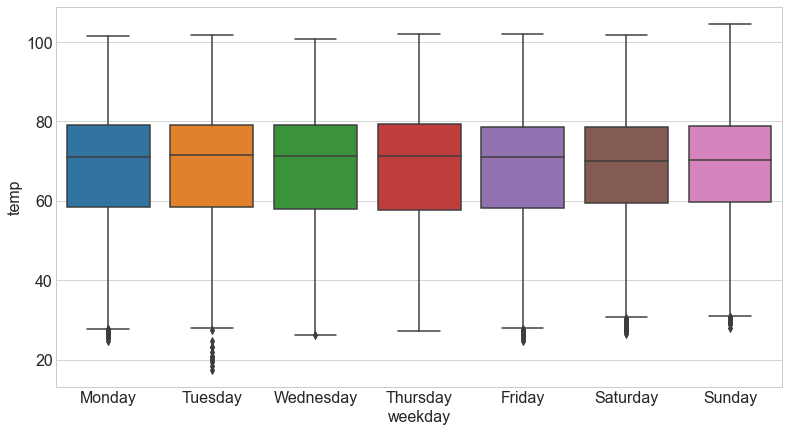

In [18]:
sns.boxplot(x = 'weekday', y = 'temp', data=train) 

<AxesSubplot:xlabel='datetime'>

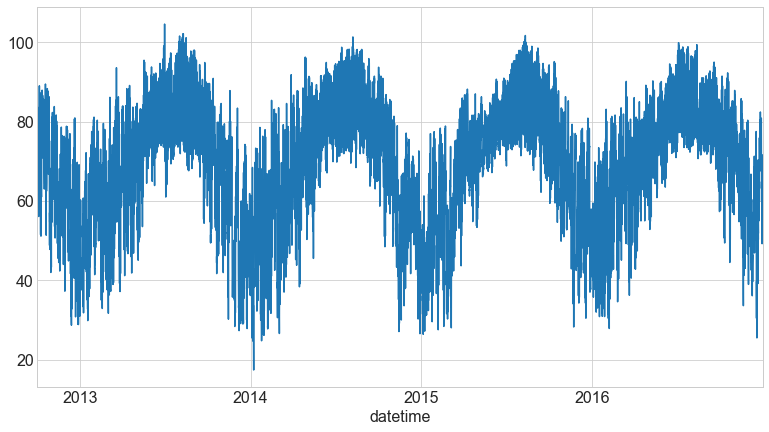

In [19]:
y.plot()

<AxesSubplot:title={'center':'6 hour average'}, xlabel='datetime'>

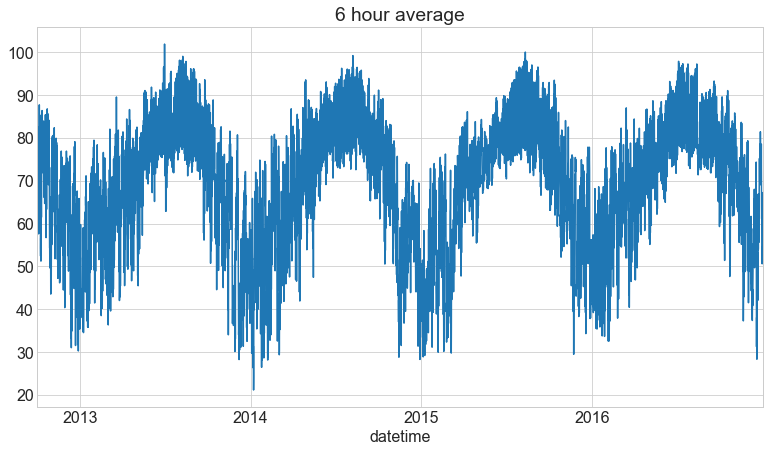

In [20]:
y.resample('6H').mean().plot(title='6 hour average')

<AxesSubplot:title={'center':'2 week average'}, xlabel='datetime'>

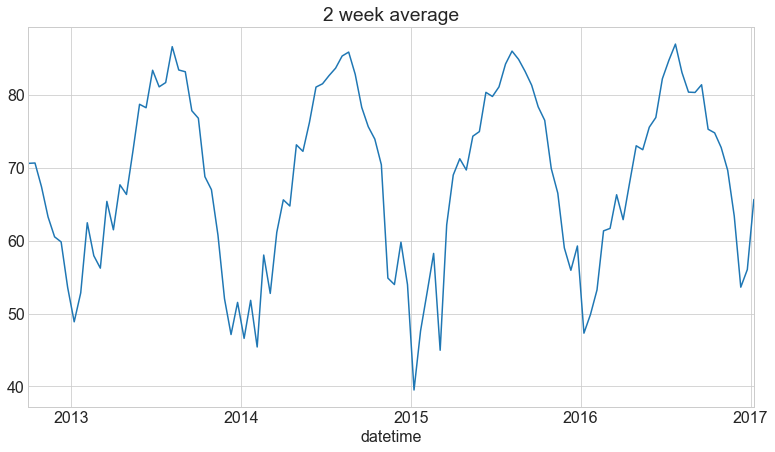

In [21]:
y.resample('2W').mean().plot(title='2 week average')

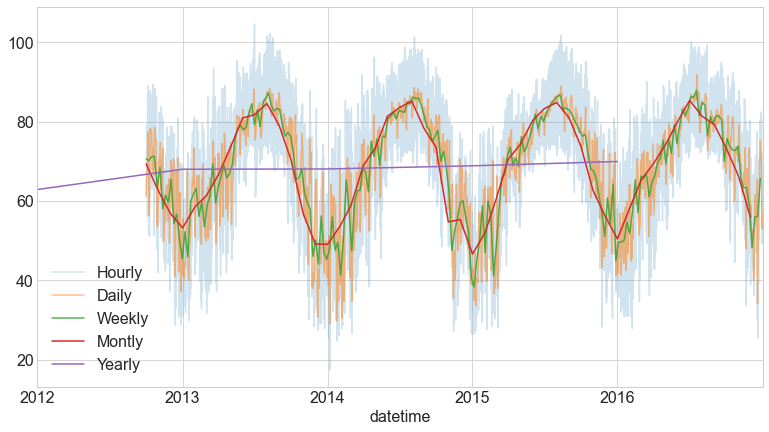

In [22]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

In [23]:
y.resample('Y').mean()

datetime
2012-12-31    62.866222
2013-12-31    67.983753
2014-12-31    68.050553
2015-12-31    68.844987
2016-12-31    69.932853
Freq: A-DEC, Name: temp, dtype: float64

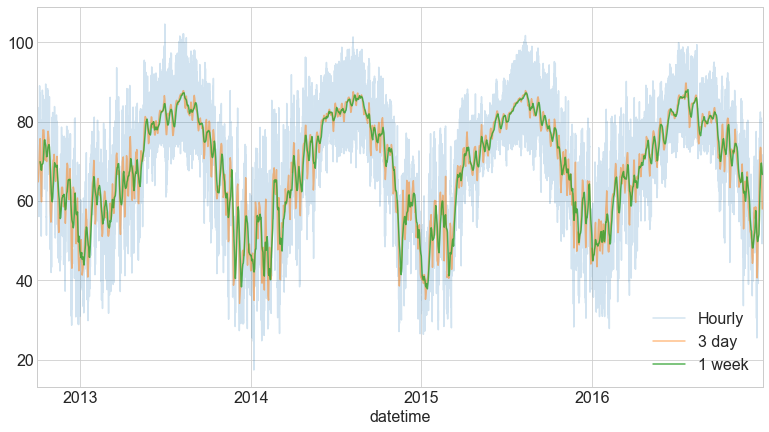

In [24]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
plt.legend()

<AxesSubplot:title={'center':'Hourly Difference in Temperature'}, xlabel='datetime'>

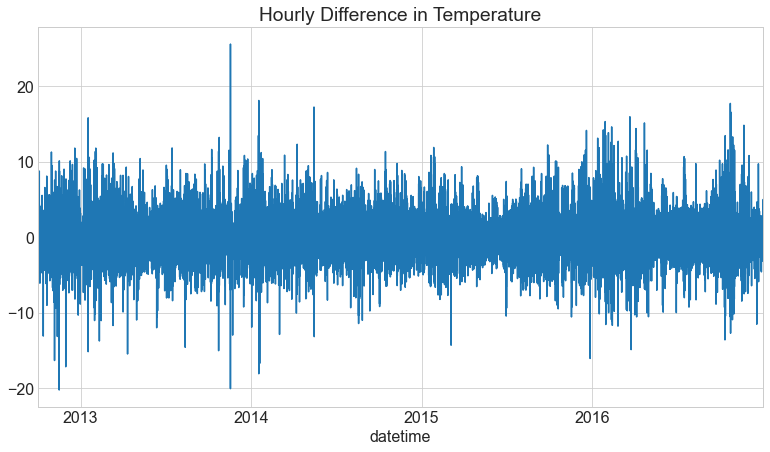

In [25]:
y.diff().plot(title='Hourly Difference in Temperature')

In [26]:
y

datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
                         ...    
2016-12-31 19:00:00    63.230000
2016-12-31 20:00:00    68.216000
2016-12-31 21:00:00    70.664000
2016-12-31 22:00:00    71.348000
2016-12-31 23:00:00    71.600000
Name: temp, Length: 37259, dtype: float64

In [27]:
y.diff()

datetime
2012-10-01 13:00:00         NaN
2012-10-01 14:00:00    0.024568
2012-10-01 15:00:00    0.062726
2012-10-01 16:00:00    0.062726
2012-10-01 17:00:00    0.062726
                         ...   
2016-12-31 19:00:00    4.752000
2016-12-31 20:00:00    4.986000
2016-12-31 21:00:00    2.448000
2016-12-31 22:00:00    0.684000
2016-12-31 23:00:00    0.252000
Name: temp, Length: 37259, dtype: float64

In [28]:
y.shift()

datetime
2012-10-01 13:00:00          NaN
2012-10-01 14:00:00    61.052000
2012-10-01 15:00:00    61.076568
2012-10-01 16:00:00    61.139294
2012-10-01 17:00:00    61.202020
                         ...    
2016-12-31 19:00:00    58.478000
2016-12-31 20:00:00    63.230000
2016-12-31 21:00:00    68.216000
2016-12-31 22:00:00    70.664000
2016-12-31 23:00:00    71.348000
Name: temp, Length: 37259, dtype: float64

<AxesSubplot:title={'center':'Hourly % Change in Temperature'}, xlabel='datetime'>

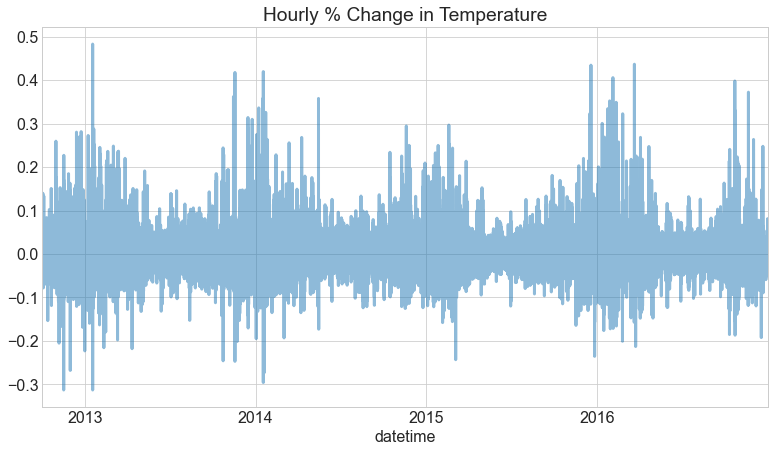

In [29]:
(y.diff() / y.shift()).plot(alpha=.5, lw=3, title='Hourly % Change in Temperature')

In [30]:
y.resample('W').mean().diff()

datetime
2012-10-07          NaN
2012-10-14    -0.442379
2012-10-21     0.985554
2012-10-28     0.092089
2012-11-04    -7.719911
                ...    
2016-12-04    -4.340288
2016-12-11   -10.898468
2016-12-18     7.815506
2016-12-25     0.094012
2017-01-01     9.567482
Freq: W-SUN, Name: temp, Length: 222, dtype: float64

<AxesSubplot:title={'center':'Average week-to-week change in temperature'}, xlabel='datetime'>

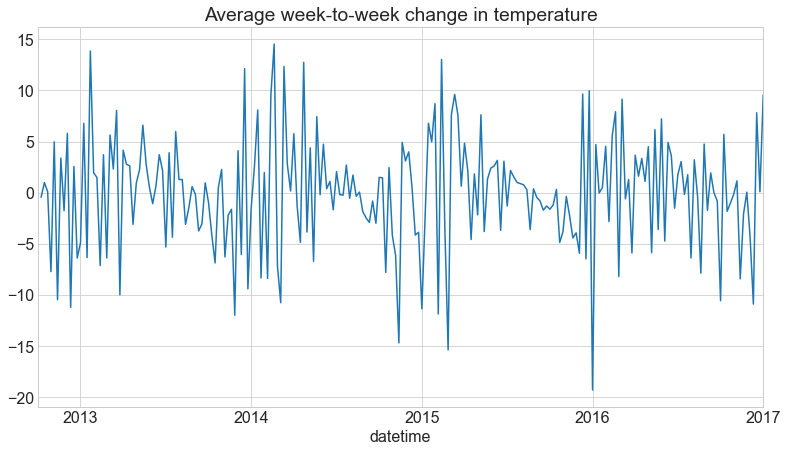

In [31]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in temperature')

<AxesSubplot:title={'center':'Average Week-to-Week % Change in Temperature'}, xlabel='datetime'>

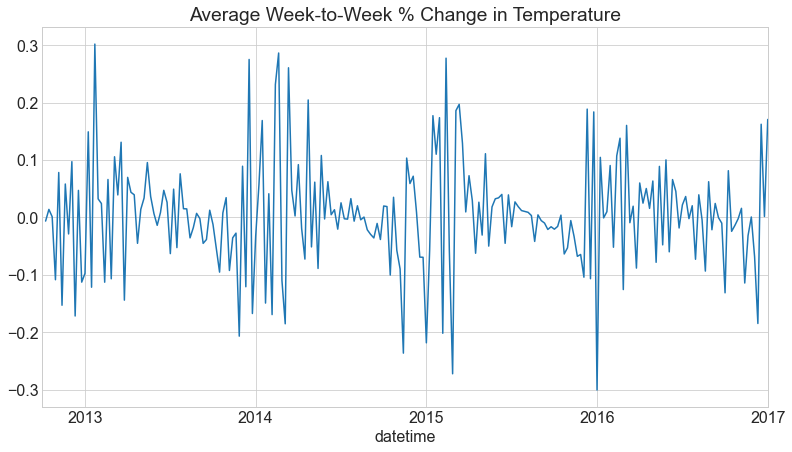

In [32]:
(y.resample('W').mean().diff() / y.resample('W').mean().shift()).plot(title='Average Week-to-Week % Change in Temperature')

In [33]:
y.resample('W').mean().shift()

datetime
2012-10-07          NaN
2012-10-14    70.595201
2012-10-21    70.152821
2012-10-28    71.138375
2012-11-04    71.230464
                ...    
2016-12-04    63.402382
2016-12-11    59.062094
2016-12-18    48.163625
2016-12-25    55.979132
2017-01-01    56.073143
Freq: W-SUN, Name: temp, Length: 222, dtype: float64

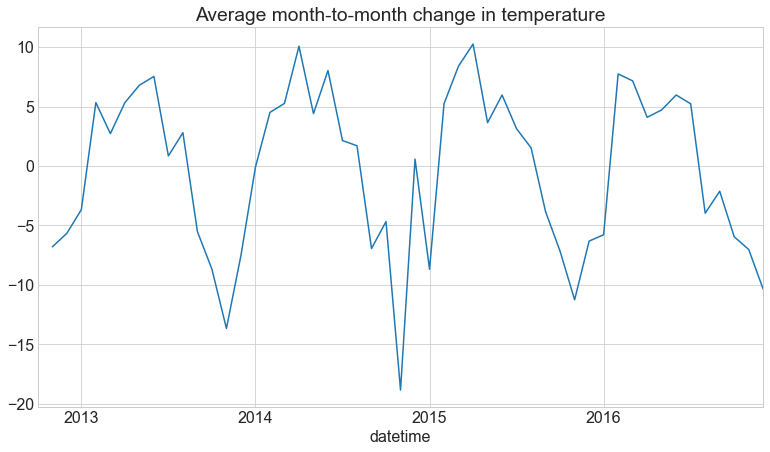

In [34]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in temperature');

<AxesSubplot:title={'center':'Average Month-to-Month % Change in Temperature'}, xlabel='datetime'>

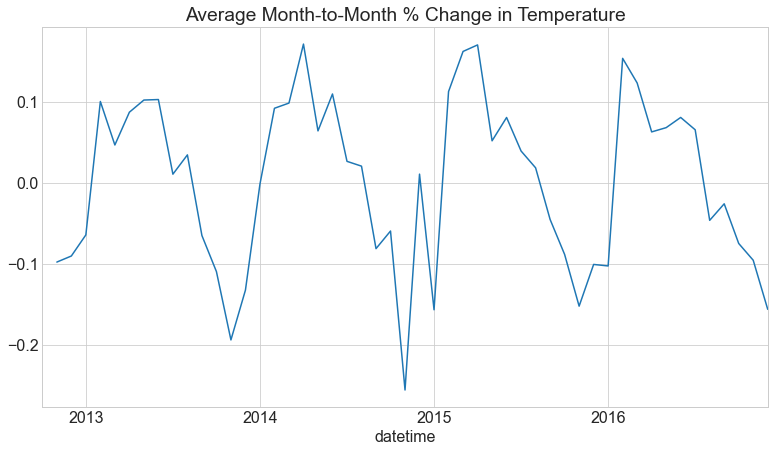

In [35]:
(y.resample('M').mean().diff() / y.resample('M').mean().shift()).plot(title='Average Month-to-Month % Change in Temperature')

In [36]:
# Start off by getting average temperate for each year-month combination:
y.groupby([y.index.year, y.index.month]).mean()

datetime  datetime
2012      10          69.318705
          11          62.521575
          12          56.860014
2013      1           53.192333
          2           58.522799
          3           61.244479
          4           66.569717
          5           73.358529
          6           80.885728
          7           81.731819
          8           84.534117
          9           79.016805
          10          70.343832
          11          56.686028
          12          49.165310
2014      1           49.072897
          2           53.579080
          3           58.842459
          4           68.908933
          5           73.311970
          6           81.337658
          7           83.476876
          8           85.178102
          9           78.238621
          10          73.567252
          11          54.735951
          12          55.311824
2015      1           46.631940
          2           51.874683
          3           60.277705
          4          

In [37]:
# unstack is similar to pivot_table and be used to break up multi-level indices. 
# In this case, we turn the 0 index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0)

datetime,2012,2013,2014,2015,2016
datetime,,,,,
1,NaN,53.192333,49.072897,46.631940,50.427347
2,NaN,58.522799,53.579080,51.874683,58.165749
3,NaN,61.244479,58.842459,60.277705,65.323011
4,NaN,66.569717,68.908933,70.526879,69.415316
5,NaN,73.358529,73.311970,74.169747,74.129780
6,NaN,80.885728,81.337658,80.135967,80.097570
7,NaN,81.731819,83.476876,83.264325,85.325640
8,NaN,84.534117,85.178102,84.789859,81.357023
9,NaN,79.016805,78.238621,80.938208,79.233476


<AxesSubplot:xlabel='datetime'>

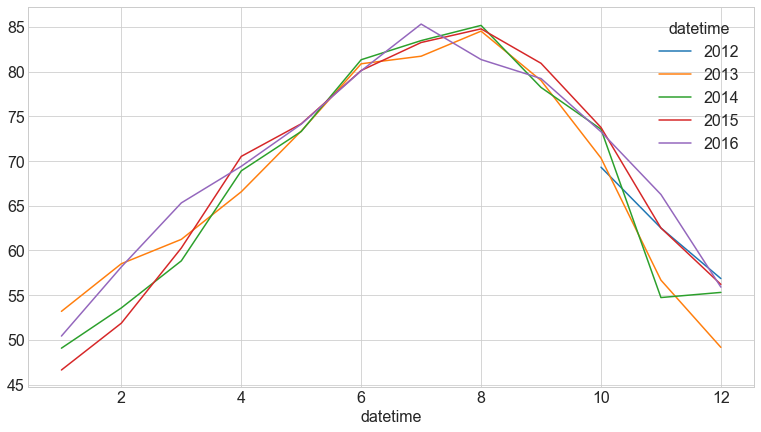

In [38]:
# Run .plot on this object
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()

In [39]:
# This is actually the same pivot table as above, but months are on the top and years are on the left
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

datetime,1,2,3,4,5,6,7,8,9,10,11,12
datetime,,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.318705,62.521575,56.860014
2013,53.192333,58.522799,61.244479,66.569717,73.358529,80.885728,81.731819,84.534117,79.016805,70.343832,56.686028,49.165310
2014,49.072897,53.579080,58.842459,68.908933,73.311970,81.337658,83.476876,85.178102,78.238621,73.567252,54.735951,55.311824
2015,46.631940,51.874683,60.277705,70.526879,74.169747,80.135967,83.264325,84.789859,80.938208,73.766466,62.519181,56.207118
2016,50.427347,58.165749,65.323011,69.415316,74.129780,80.097570,85.325640,81.357023,79.233476,73.284788,66.265047,55.903224


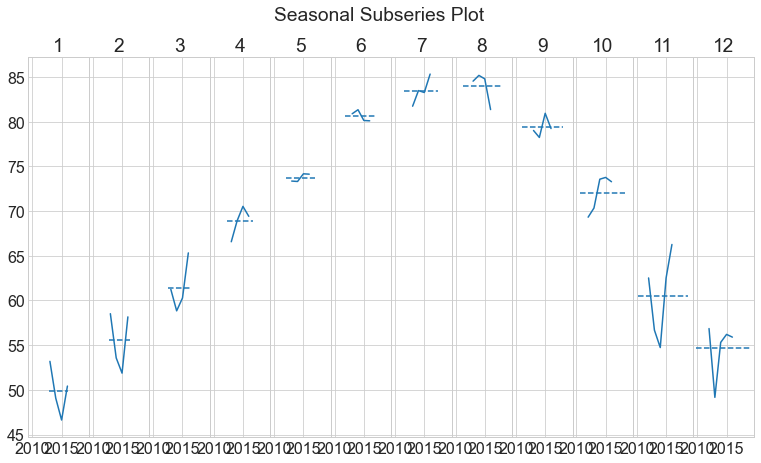

In [40]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

In [41]:
train['y(t + 1)'] = train.temp.shift(-1)

In [42]:
train

,temp,month,weekday,y(t + 1)
datetime,,,,
2012-10-01 13:00:00,61.052000,10-Oct,Monday,61.076568
2012-10-01 14:00:00,61.076568,10-Oct,Monday,61.139294
2012-10-01 15:00:00,61.139294,10-Oct,Monday,61.202020
2012-10-01 16:00:00,61.202020,10-Oct,Monday,61.264747
2012-10-01 17:00:00,61.264747,10-Oct,Monday,61.327473
...,...,...,...,...
2016-12-31 19:00:00,63.230000,12-Dec,Saturday,68.216000
2016-12-31 20:00:00,68.216000,12-Dec,Saturday,70.664000
2016-12-31 21:00:00,70.664000,12-Dec,Saturday,71.348000


[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

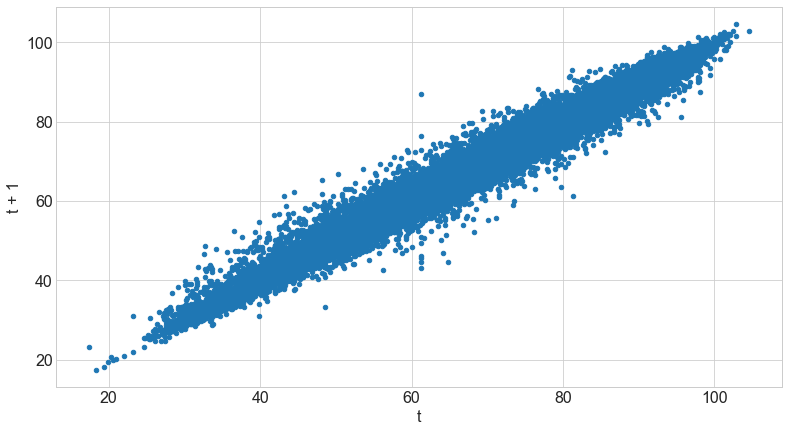

In [43]:
ax = train.plot.scatter(x='temp', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

In [44]:
del train['y(t + 1)']

<AxesSubplot:xlabel='temp', ylabel='temp_next_day'>

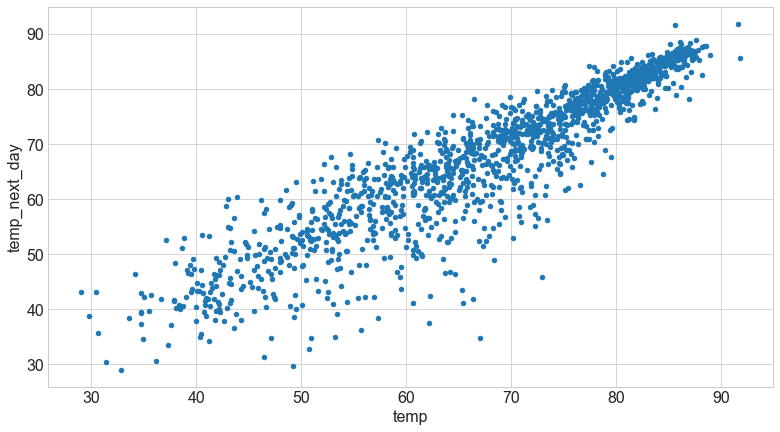

In [45]:
daily = train.resample('D').mean()
daily['temp_next_day'] = daily.temp.shift(-1)
daily.plot.scatter(x='temp', y='temp_next_day')

In [46]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.temp.shift(-1)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.head()

,this_week,the_next_week
datetime,,
2012-10-07,70.595201,70.152821
2012-10-14,70.152821,71.138375
2012-10-21,71.138375,71.230464
2012-10-28,71.230464,63.510554
2012-11-04,63.510554,68.482625


<AxesSubplot:xlabel='this_week', ylabel='the_next_week'>

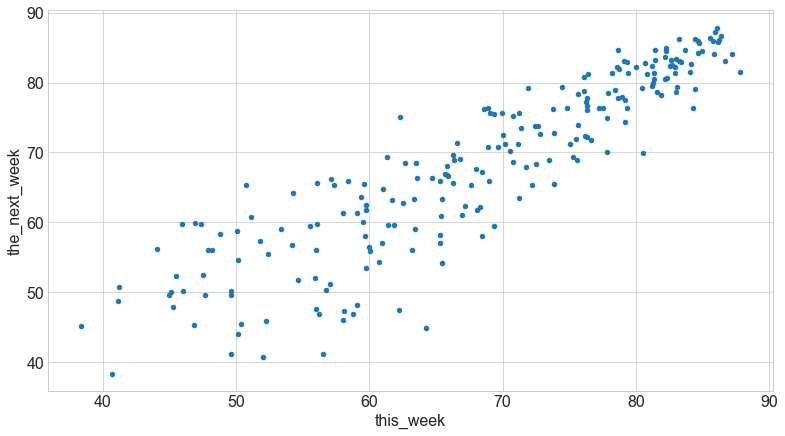

In [47]:
weekly.plot.scatter(x='this_week', y='the_next_week')

,this_week,12_weeks_out
datetime,,
2012-10-07,70.595201,50.376741
2012-10-14,70.152821,45.473616
2012-10-21,71.138375,52.252877
2012-10-28,71.230464,45.907936
2012-11-04,63.510554,59.763739


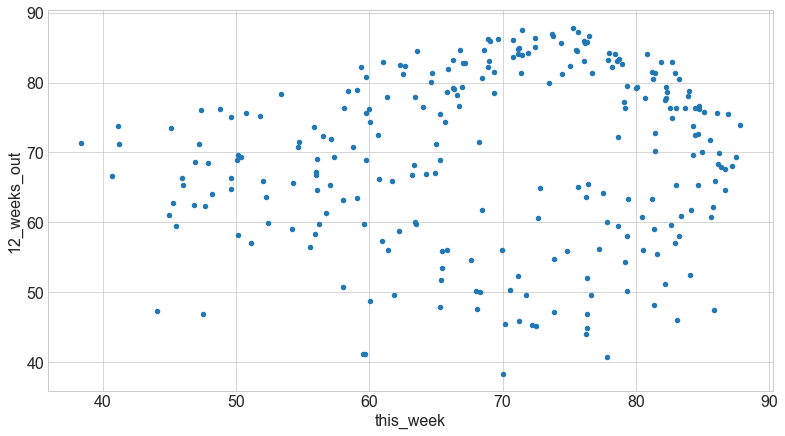

In [48]:
weekly = df.resample('W').mean()
weekly['12_weeks_out'] = weekly.temp.shift(-12)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly.head()

,this_week,26_weeks_out
datetime,,
2012-10-07,70.595201,63.558611
2012-10-14,70.152821,66.345532
2012-10-21,71.138375,68.965502
2012-10-28,71.230464,65.862071
2012-11-04,63.510554,66.797107


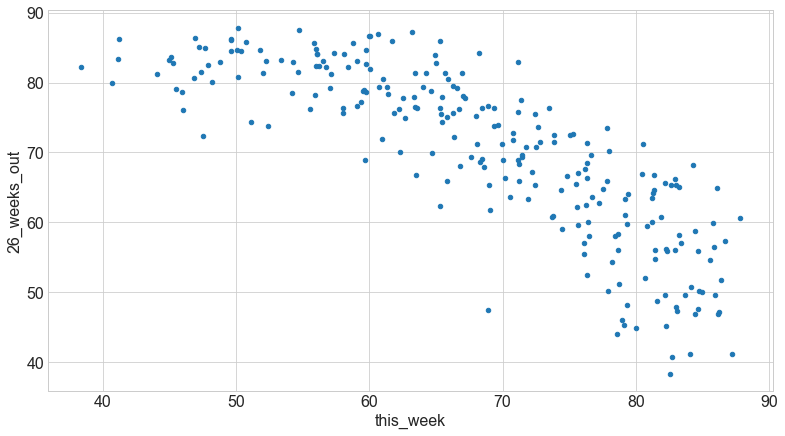

In [49]:
weekly = df.resample('W').mean()
weekly['26_weeks_out'] = weekly.temp.shift(-26)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='26_weeks_out')
weekly.head()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

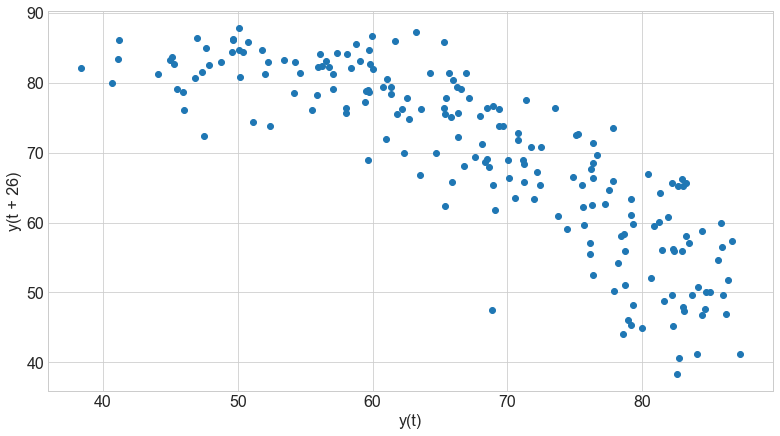

In [50]:
# easier way. Use pd.plotting.lag_plot(series, lag):m
pd.plotting.lag_plot(train.temp.resample('W').mean(), lag=26)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

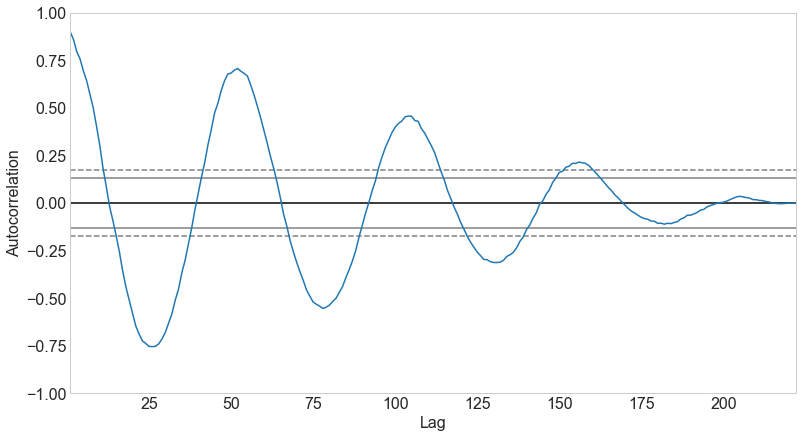

In [51]:
pd.plotting.autocorrelation_plot(train.temp.resample('W').mean())

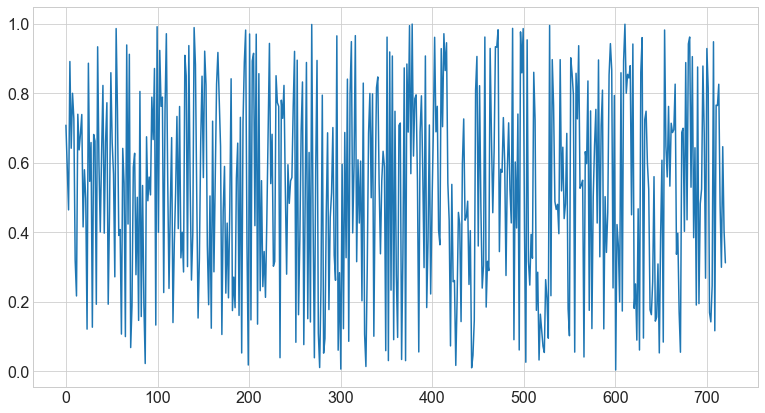

In [52]:
grid = np.linspace(0, 720, 500)
noise = np.random.rand(500)
# result_curve =  noise
plt.plot(grid, noise)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

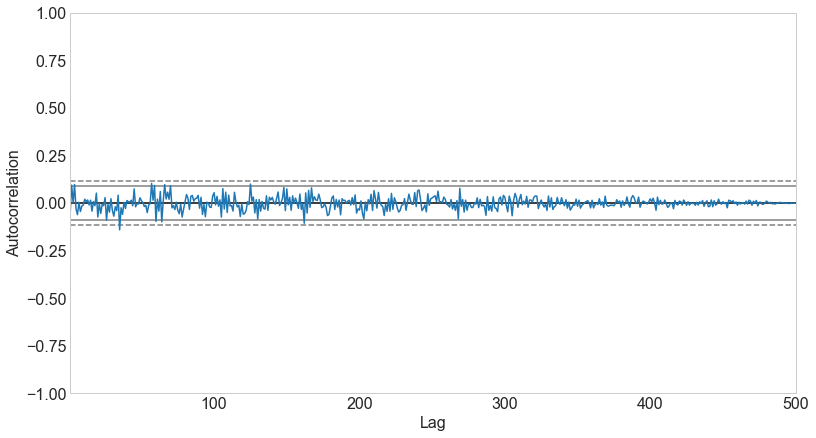

In [53]:
#plot the autocorrelation for noise

pd.plotting.autocorrelation_plot(noise)

In [54]:
y = train.temp.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
result

In [55]:
# we can access different attributes of object created above (e.g. seasonal, trend and resid)
result.seasonal

datetime
2012-10-07     8.545501
2012-10-14     7.255470
2012-10-21     2.468309
2012-10-28     1.820126
2012-11-04    -0.114287
                ...    
2016-12-04   -14.650102
2016-12-11   -13.263237
2016-12-18   -12.765114
2016-12-25   -13.857895
2017-01-01   -24.587601
Freq: W-SUN, Name: seasonal, Length: 222, dtype: float64

In [56]:
# Make a dataframe:

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
datetime,,,,
2012-10-07,70.595201,NaN,8.545501,NaN
2012-10-14,70.152821,NaN,7.255470,NaN
2012-10-21,71.138375,NaN,2.468309,NaN
2012-10-28,71.230464,NaN,1.820126,NaN
2012-11-04,63.510554,NaN,-0.114287,NaN


In [57]:
decomposition.tail()

,y,trend,seasonal,resid
datetime,,,,
2016-12-04,59.062094,NaN,-14.650102,NaN
2016-12-11,48.163625,NaN,-13.263237,NaN
2016-12-18,55.979132,NaN,-12.765114,NaN
2016-12-25,56.073143,NaN,-13.857895,NaN
2017-01-01,65.640625,NaN,-24.587601,NaN


<AxesSubplot:xlabel='datetime'>

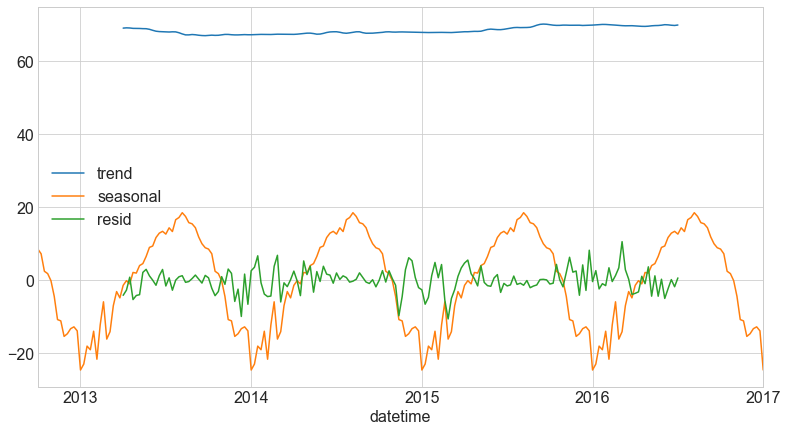

In [58]:
decomposition.iloc[:, 1:].plot()

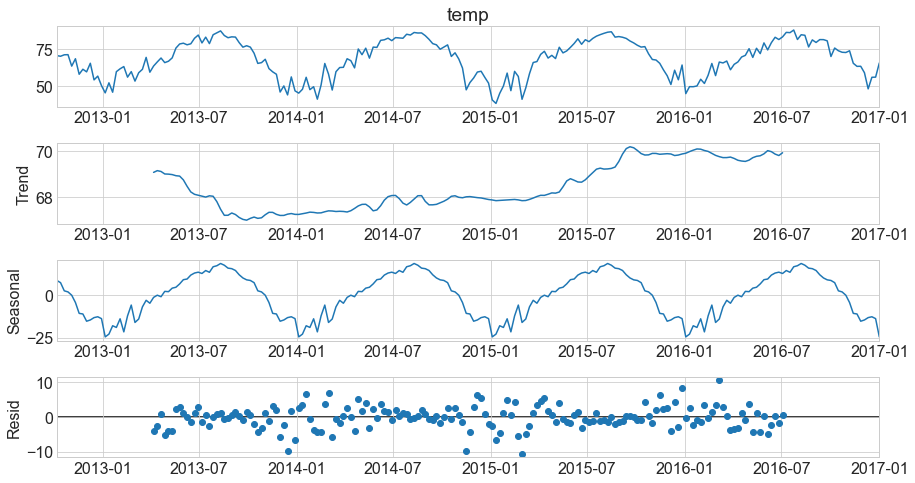

In [59]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

In [60]:
train = train.resample('D').mean()
train.head()

,temp
datetime,
2012-10-01,61.330942
2012-10-02,65.678822
2012-10-03,67.411250
2012-10-04,67.703750
2012-10-05,77.073125


In [61]:
# create a categorical feature
train['temp_bin'] = pd.qcut(train.temp, 4, labels=['cold', 'cool', 'warm', 'hot'])
train.groupby('temp_bin').temp.mean()

temp_bin
cold    49.381699
cool    65.200219
warm    75.447977
hot     83.449087
Name: temp, dtype: float64

In [62]:
train.head()

,temp,temp_bin
datetime,,
2012-10-01,61.330942,cool
2012-10-02,65.678822,cool
2012-10-03,67.411250,cool
2012-10-04,67.703750,cool
2012-10-05,77.073125,warm


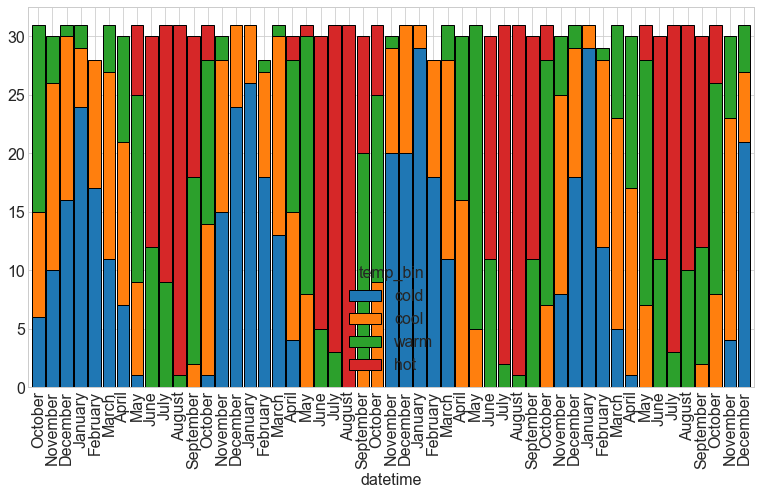

In [63]:
ax = (train.groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
# take the existing labels, convert them to Timestamps, and then reformat with .strftime
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);

Text(0, 0.5, '% of days in the month')

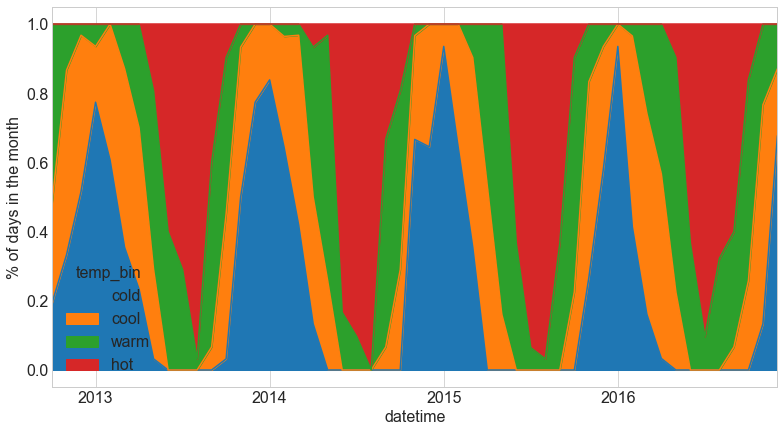

In [64]:
(train.groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

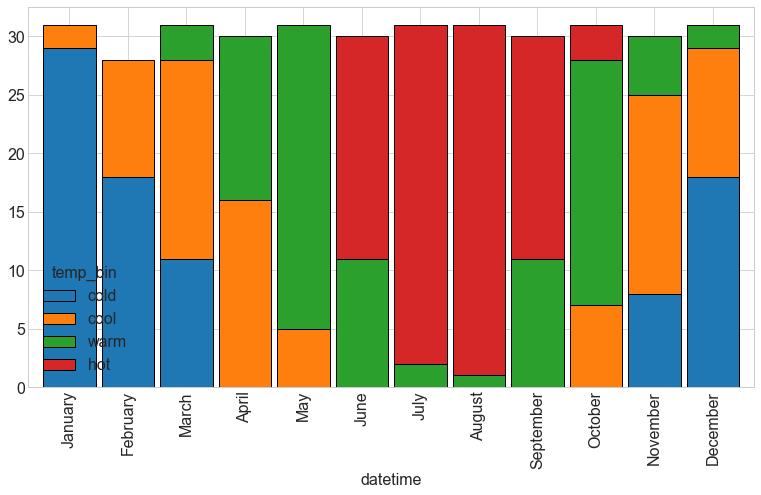

In [65]:
ax = (train['2015']
 .groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)

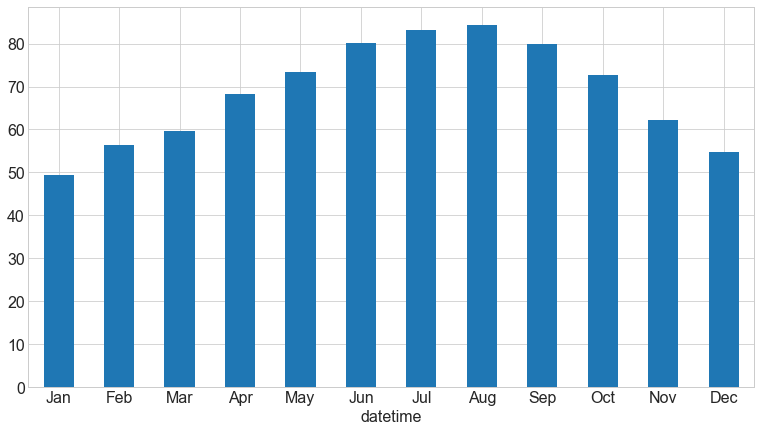

In [66]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0);
# 01-Jan [3:]

In [67]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

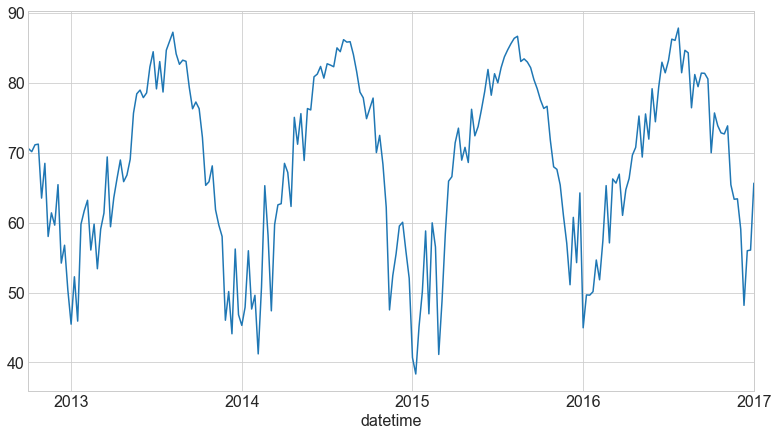

In [68]:
# how can i customize the x axis label here?

y.resample('W').mean().plot()
plt.xticks();

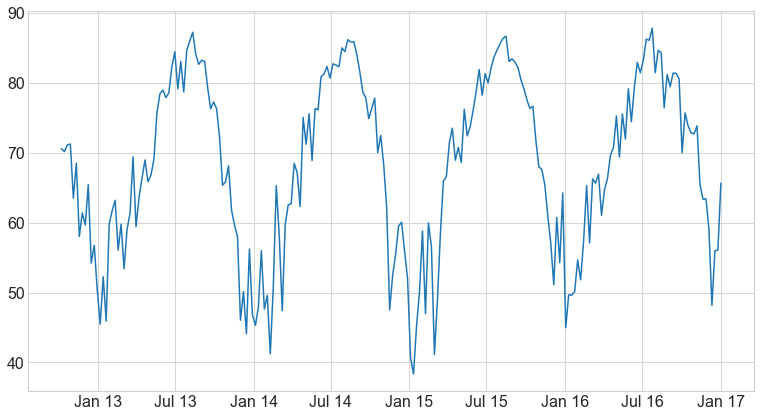

In [69]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))

In [77]:
df = a.wrangle_store_data()
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [78]:
def train_validate_test_split(df, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 15% of the original dataset, validate is .1765*.85= 15% of the 
    original dataset, and train is 70% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.15, 
                                            random_state=seed)
    train, validate = train_test_split(train_validate, test_size=0.1765, 
                                       random_state=seed)
    return train, validate, test

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
train, validate, test = train_validate_test_split(df)

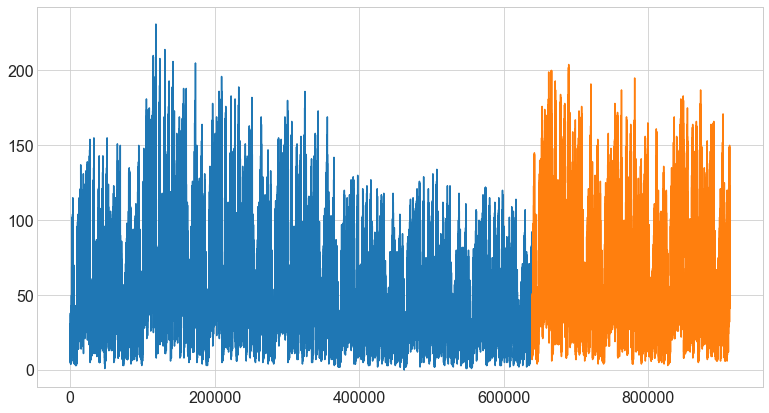

In [85]:
train_size = 0.70 # 70% train, 30% test
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # Everything up to but not including the test_start_index
test = df[test_start_index:] # Everything from the test_start_index to the end

plt.plot(train.index, train.sale_amount)
plt.plot(test.index, test.sale_amount)

In [89]:
df.sale_date = pd.to_datetime(df.sale_date)

In [90]:
df['month'] = df.sale_date.dt.month
df['day'] = df.sale_date.dt.day

In [91]:
df = df.set_index("sale_date").sort_index()

In [94]:
train, validate, test = train_validate_test_split(df)

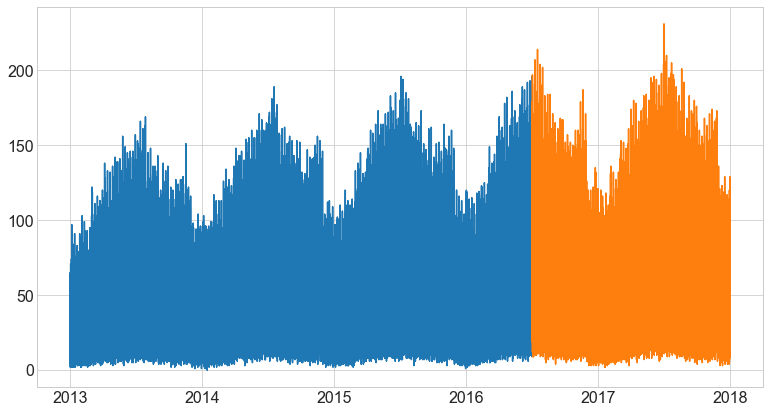

In [96]:
train_size = 0.70 # 70% train, 30% test
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # Everything up to but not including the test_start_index
test = df[test_start_index:] # Everything from the test_start_index to the end

plt.plot(train.index, train.sale_amount)
plt.plot(test.index, test.sale_amount)

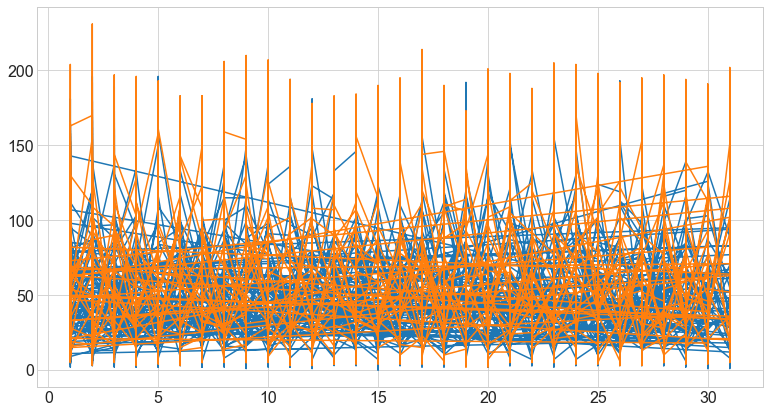

In [101]:
train_size = 0.70 # 70% train, 30% test
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # Everything up to but not including the test_start_index
test = df[test_start_index:] # Everything from the test_start_index to the end

plt.plot(train.day, train.sale_amount)
plt.plot(test.day, test.sale_amount)

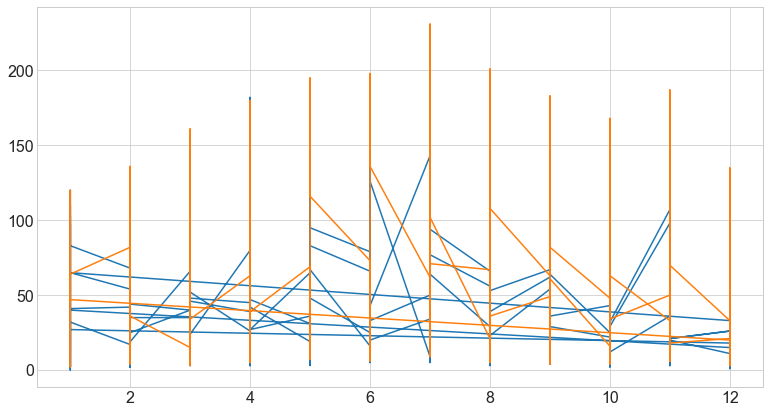

In [102]:
train_size = 0.70 # 70% train, 30% test
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # Everything up to but not including the test_start_index
test = df[test_start_index:] # Everything from the test_start_index to the end

plt.plot(train.month, train.sale_amount)
plt.plot(test.month, test.sale_amount)

In [105]:
def wrangle_opsd_data():
    '''
    Checks for a local cache of opsd.csv and if not present will run the get_store_data() function which acquires data from Codeup's mysql server
    '''
    filename = 'ops_germany_daily.csv'
    
    if os.path.isfile(filename):
        df = pd.read_csv(filename)
    else:
        df = get_store_data()
        
    return df

In [106]:
df = wrangle_opsd_data()
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [115]:
df = df.fillna(0)

In [109]:
df.Date = pd.to_datetime(df.Date)

In [110]:
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

In [120]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar,month,year
0,2006-01-01,1069.184,0.0,0.0,0.0,1,2006
1,2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2,2006-01-03,1442.533,0.0,0.0,0.0,1,2006
3,2006-01-04,1457.217,0.0,0.0,0.0,1,2006
4,2006-01-05,1477.131,0.0,0.0,0.0,1,2006


<AxesSubplot:xlabel='Date', ylabel='Solar'>

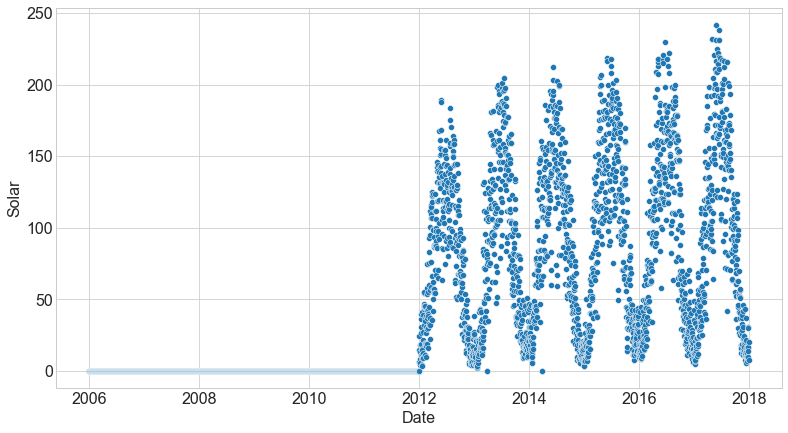

In [126]:
sns.scatterplot(x=df.Date, y= df.Solar)

<AxesSubplot:xlabel='Date', ylabel='Wind'>

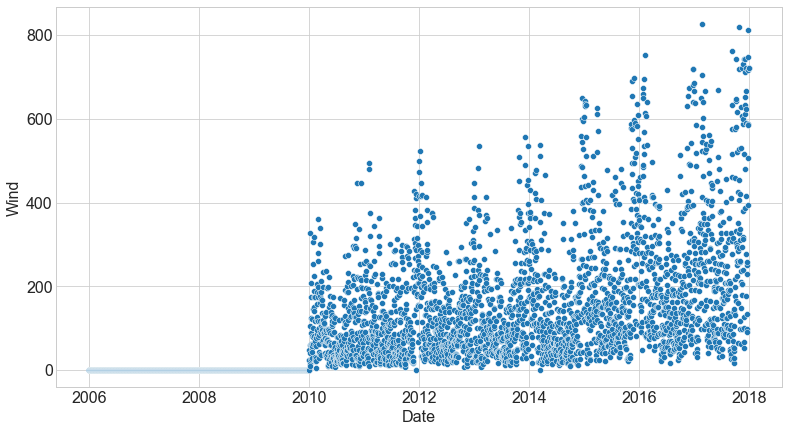

In [127]:
sns.scatterplot(x=df.Date, y= df.Wind)

<AxesSubplot:xlabel='Date', ylabel='Consumption'>

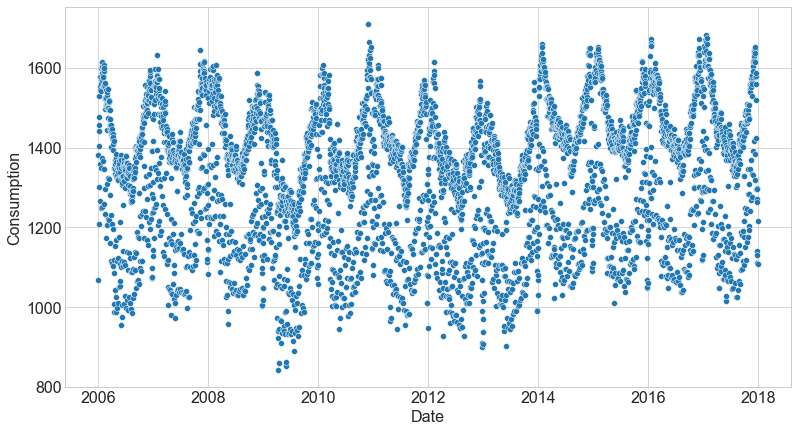

In [128]:
sns.scatterplot(x=df.Date, y= df.Consumption)

<AxesSubplot:xlabel='Date', ylabel='Consumption'>

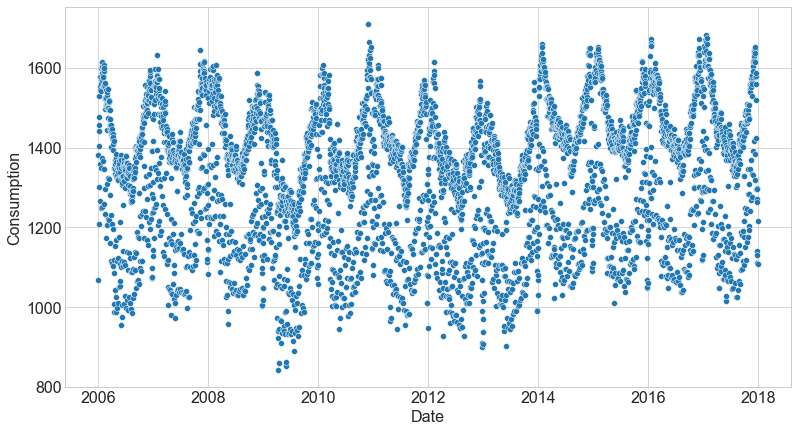

In [134]:
sns.scatterplot(x=df.Date, y= df.Consumption, data=df[df.year == 2010])

<AxesSubplot:xlabel='month', ylabel='Consumption'>

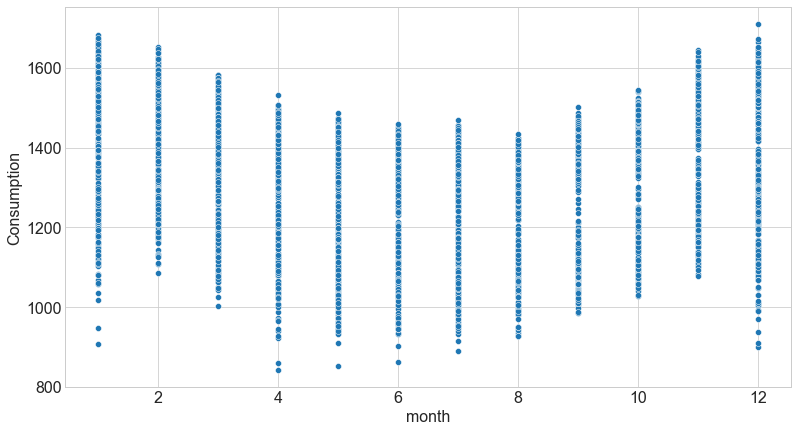

In [132]:
sns.scatterplot(x=df.month, y= df.Consumption)

<AxesSubplot:xlabel='year', ylabel='Consumption'>

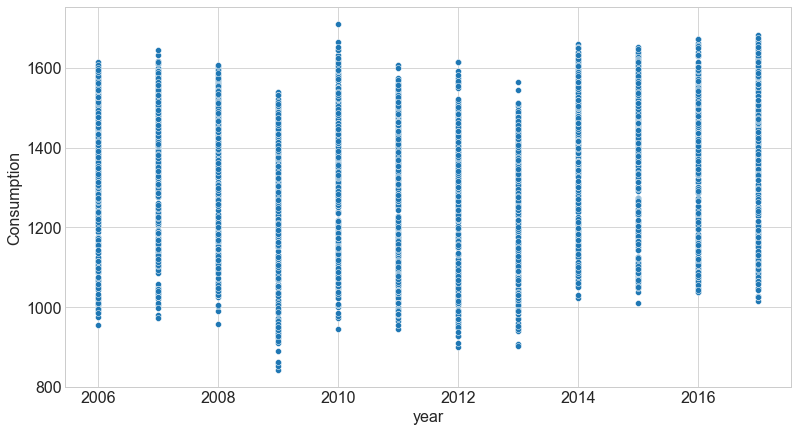

In [133]:
sns.scatterplot(x=df.year, y= df.Consumption)

<AxesSubplot:xlabel='Date', ylabel='Consumption'>

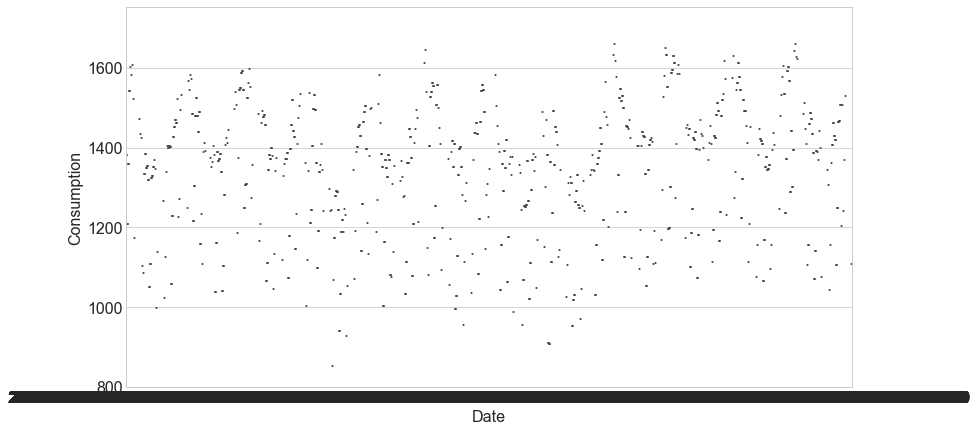

In [135]:
sns.boxplot(x=df.Date, y= df.Consumption, data=df[df.year == 2010])